In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [3]:
movies.columns = ["Film","Genre","RottenTomatoesRating","AudienceRating","BudgetMillions","ReleaseYear"]
movies.head()

,Film,Genre,RottenTomatoesRating,AudienceRating,BudgetMillions,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Film                  559 non-null    object
 1   Genre                 559 non-null    object
 2   RottenTomatoesRating  559 non-null    int64 
 3   AudienceRating        559 non-null    int64 
 4   BudgetMillions        559 non-null    int64 
 5   ReleaseYear           559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [5]:
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.ReleaseYear = movies.ReleaseYear.astype("category")

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Film                  559 non-null    category
 1   Genre                 559 non-null    category
 2   RottenTomatoesRating  559 non-null    int64   
 3   AudienceRating        559 non-null    int64   
 4   BudgetMillions        559 non-null    int64   
 5   ReleaseYear           559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [7]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoesRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


--------------
--------------

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

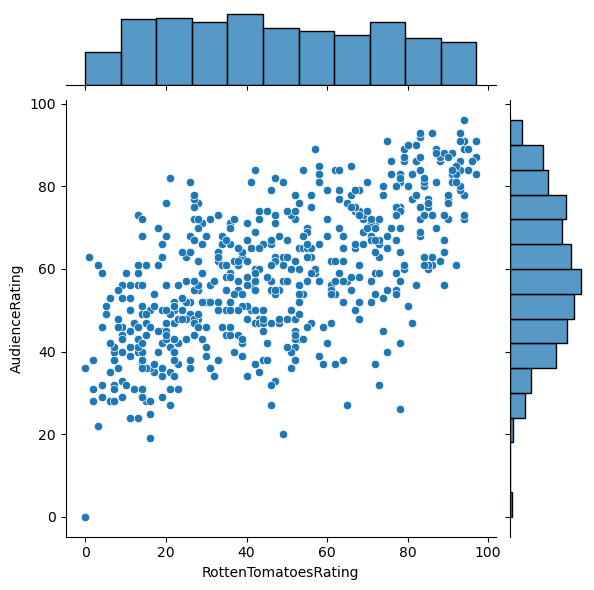

In [9]:
jp = sns.jointplot(data=movies,x="RottenTomatoesRating",y="AudienceRating")

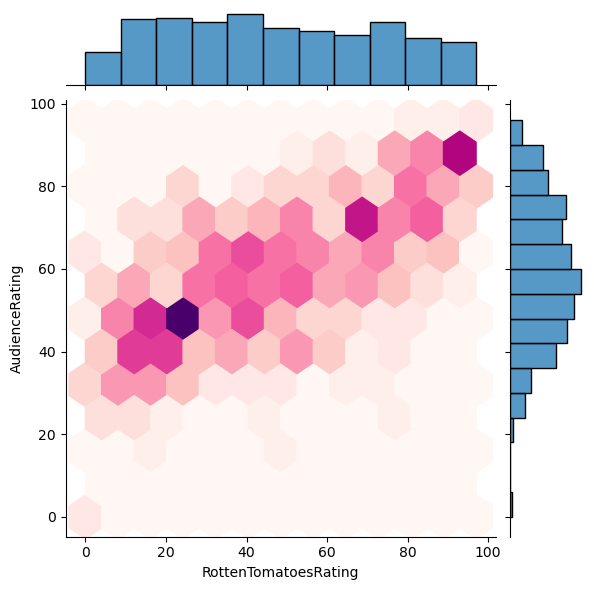

In [10]:
jp = sns.jointplot(data=movies,x="RottenTomatoesRating",y="AudienceRating",kind="hex",cmap="RdPu")

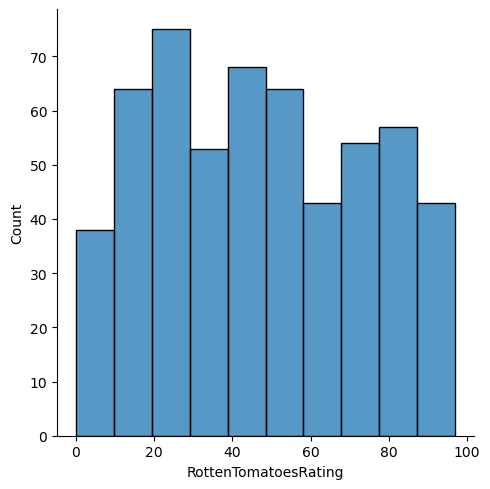

In [11]:
h1 = sns.displot(movies.RottenTomatoesRating, bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


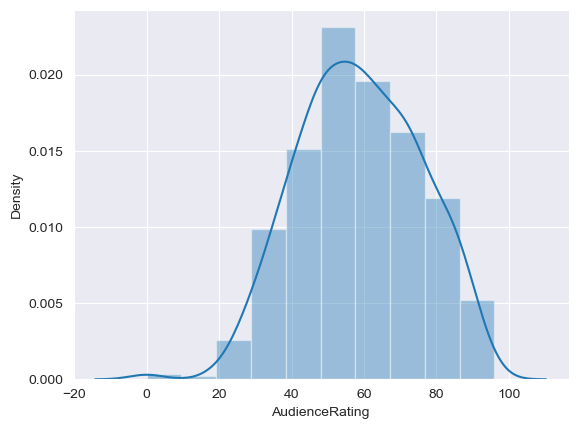

In [12]:
sns.set_style("darkgrid")
h2 = sns.distplot(movies.AudienceRating, bins=10)

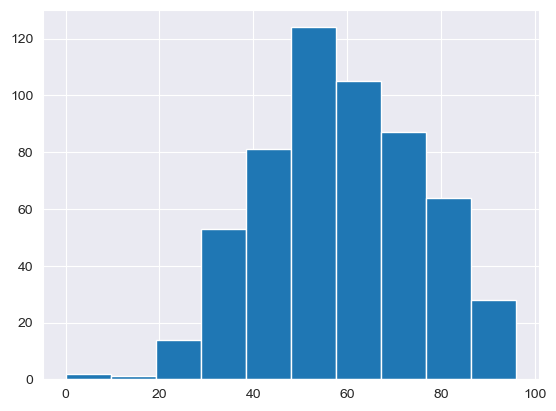

In [13]:
h3 = plt.hist(movies.AudienceRating, bins=10)

In the audience rating, there is approximately a normal distribution, however the Rotten Tomatoes Rating by critics doesn't quite fit in a normal distribution, that is because it is based on certain judging metrics.

-----------
-----------

<function matplotlib.pyplot.show(close=None, block=None)>

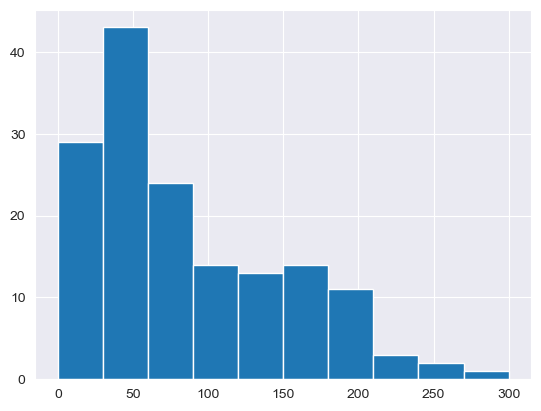

In [14]:
plt.hist(movies[movies.Genre=="Action"].BudgetMillions, bins=10)
plt.show

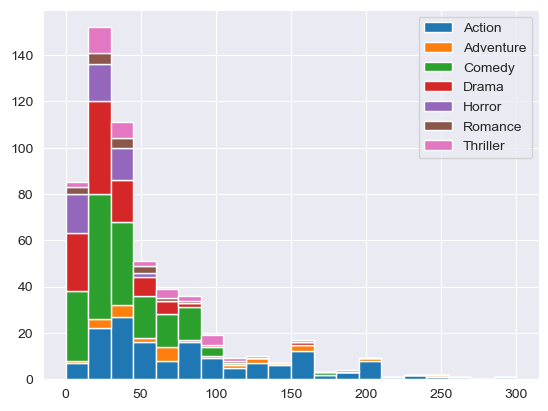

In [15]:
cat_list=[]
gen_list=[]
for i in movies.Genre.cat.categories:
    cat_list.append(movies[movies.Genre==i].BudgetMillions)
    gen_list.append(i)

plt.hist(cat_list,bins=20,stacked=True,rwidth=1,label=gen_list)
plt.legend()
plt.show()

---
---

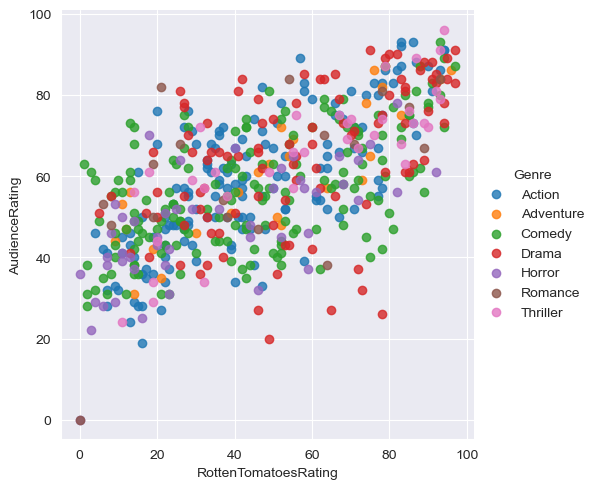

In [16]:
lm1 = sns.lmplot(data=movies,x="RottenTomatoesRating",y="AudienceRating",fit_reg=False,hue="Genre")

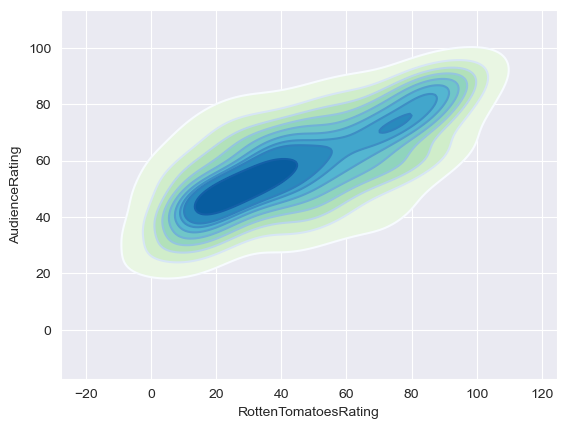

In [17]:
kde1 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating, shade=True,cmap='GnBu')
kde2 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating,cmap='Blues')

---
---

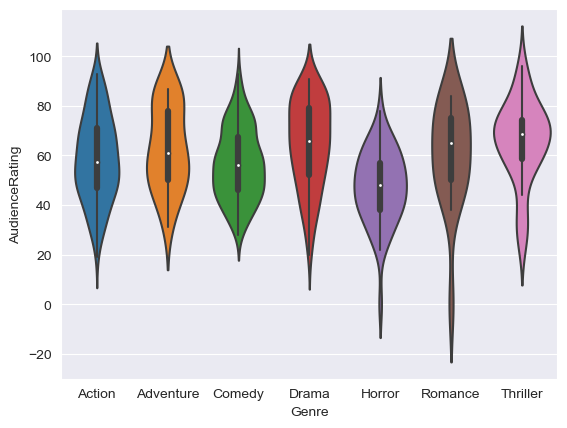

In [18]:
v1  =sns.violinplot(data=movies,x="Genre",y="AudienceRating")

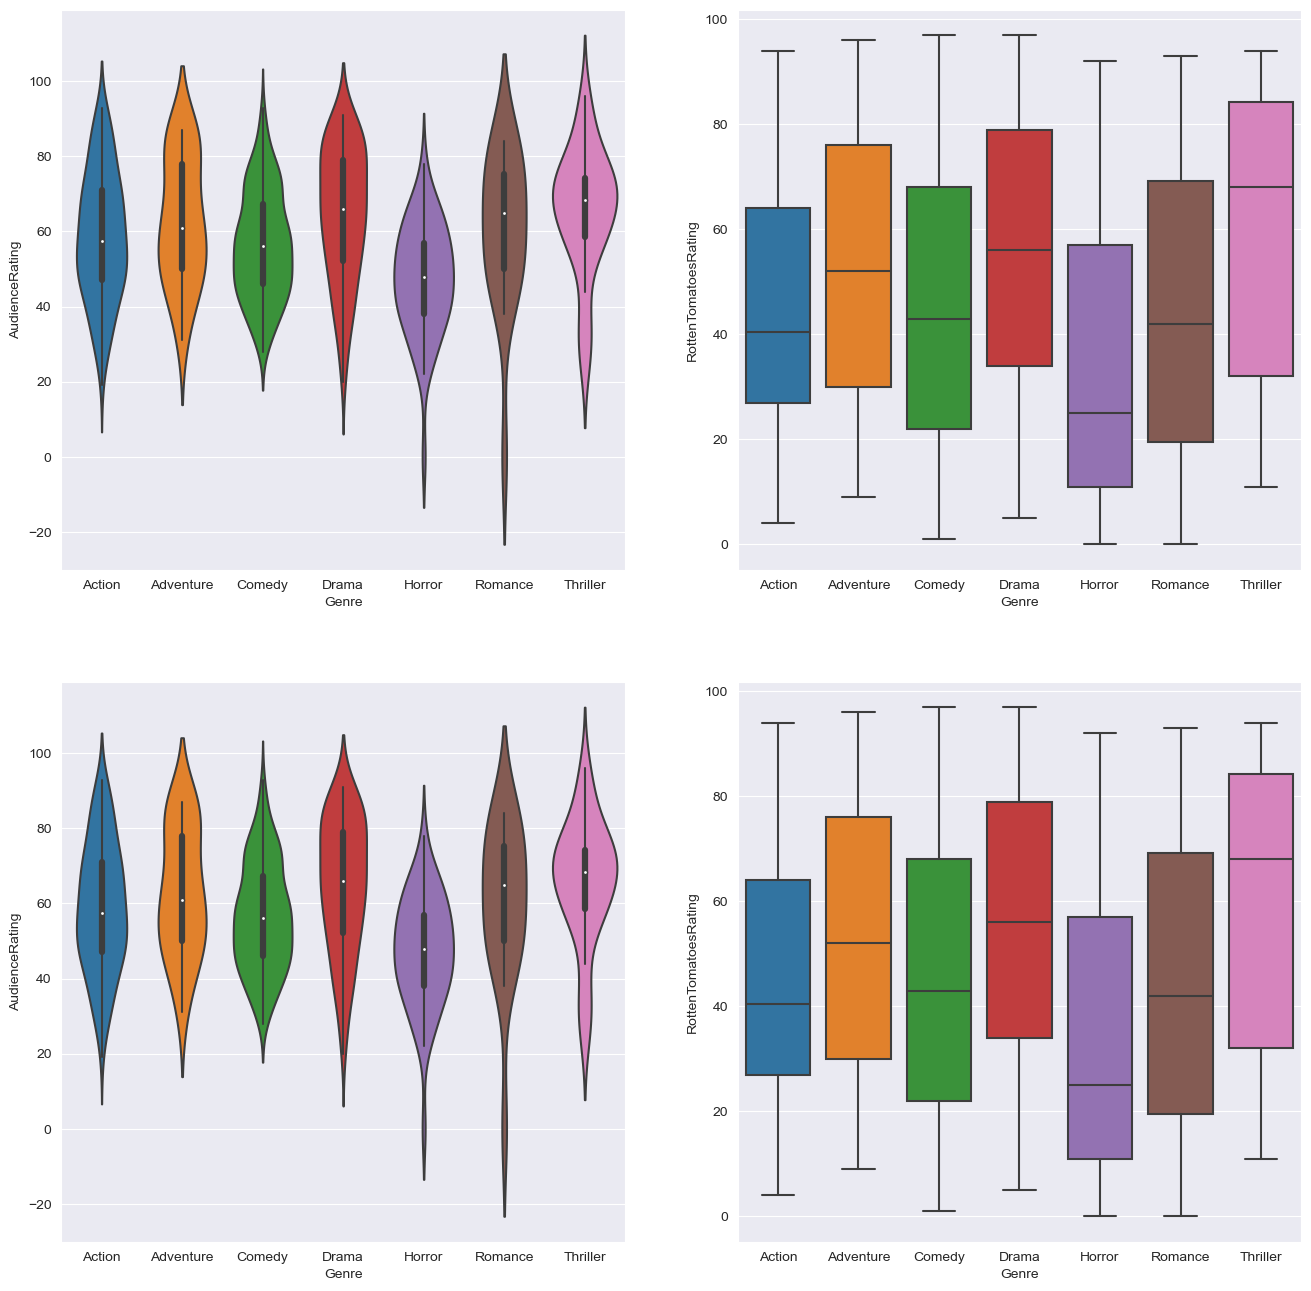

In [19]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
v1  =sns.violinplot(data=movies,x="Genre",y="AudienceRating",ax=axes[0,0])
v1  =sns.boxplot(data=movies,x="Genre",y="RottenTomatoesRating",ax=axes[0,1])
v1  =sns.violinplot(data=movies,x="Genre",y="AudienceRating",ax=axes[1,0])
v1  =sns.boxplot(data=movies,x="Genre",y="RottenTomatoesRating",ax=axes[1,1])

---
---

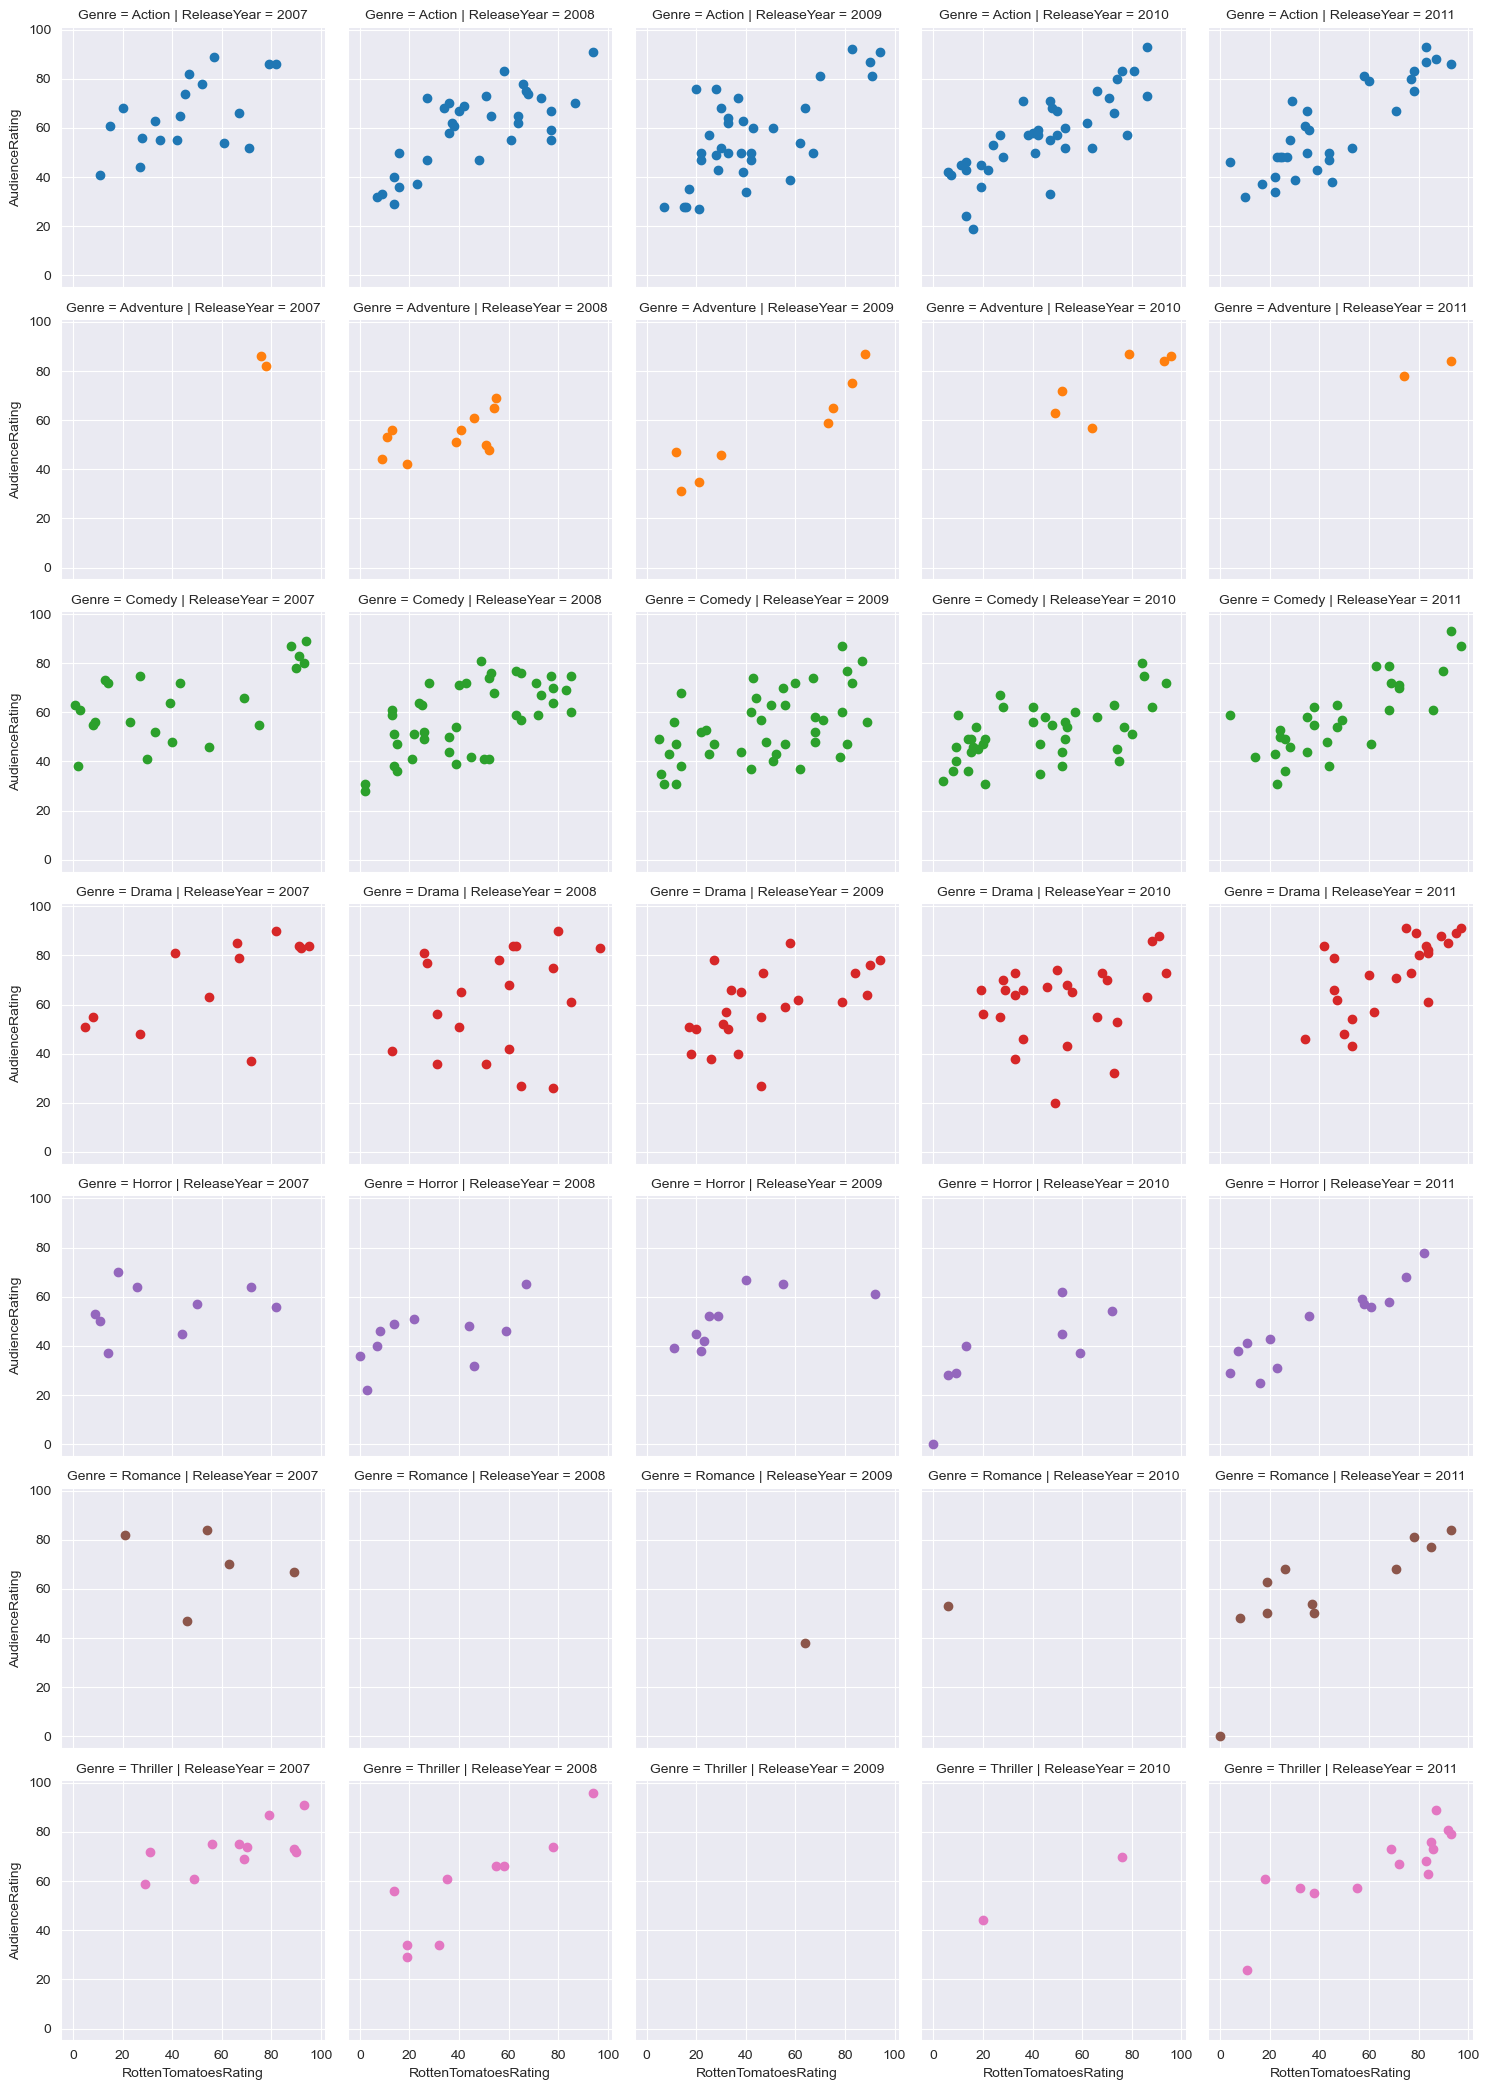

In [20]:
fg1 = sns.FacetGrid(data=movies,row="Genre",col="ReleaseYear",hue="Genre")
fg1 = fg1.map(plt.scatter,"RottenTomatoesRating","AudienceRating")

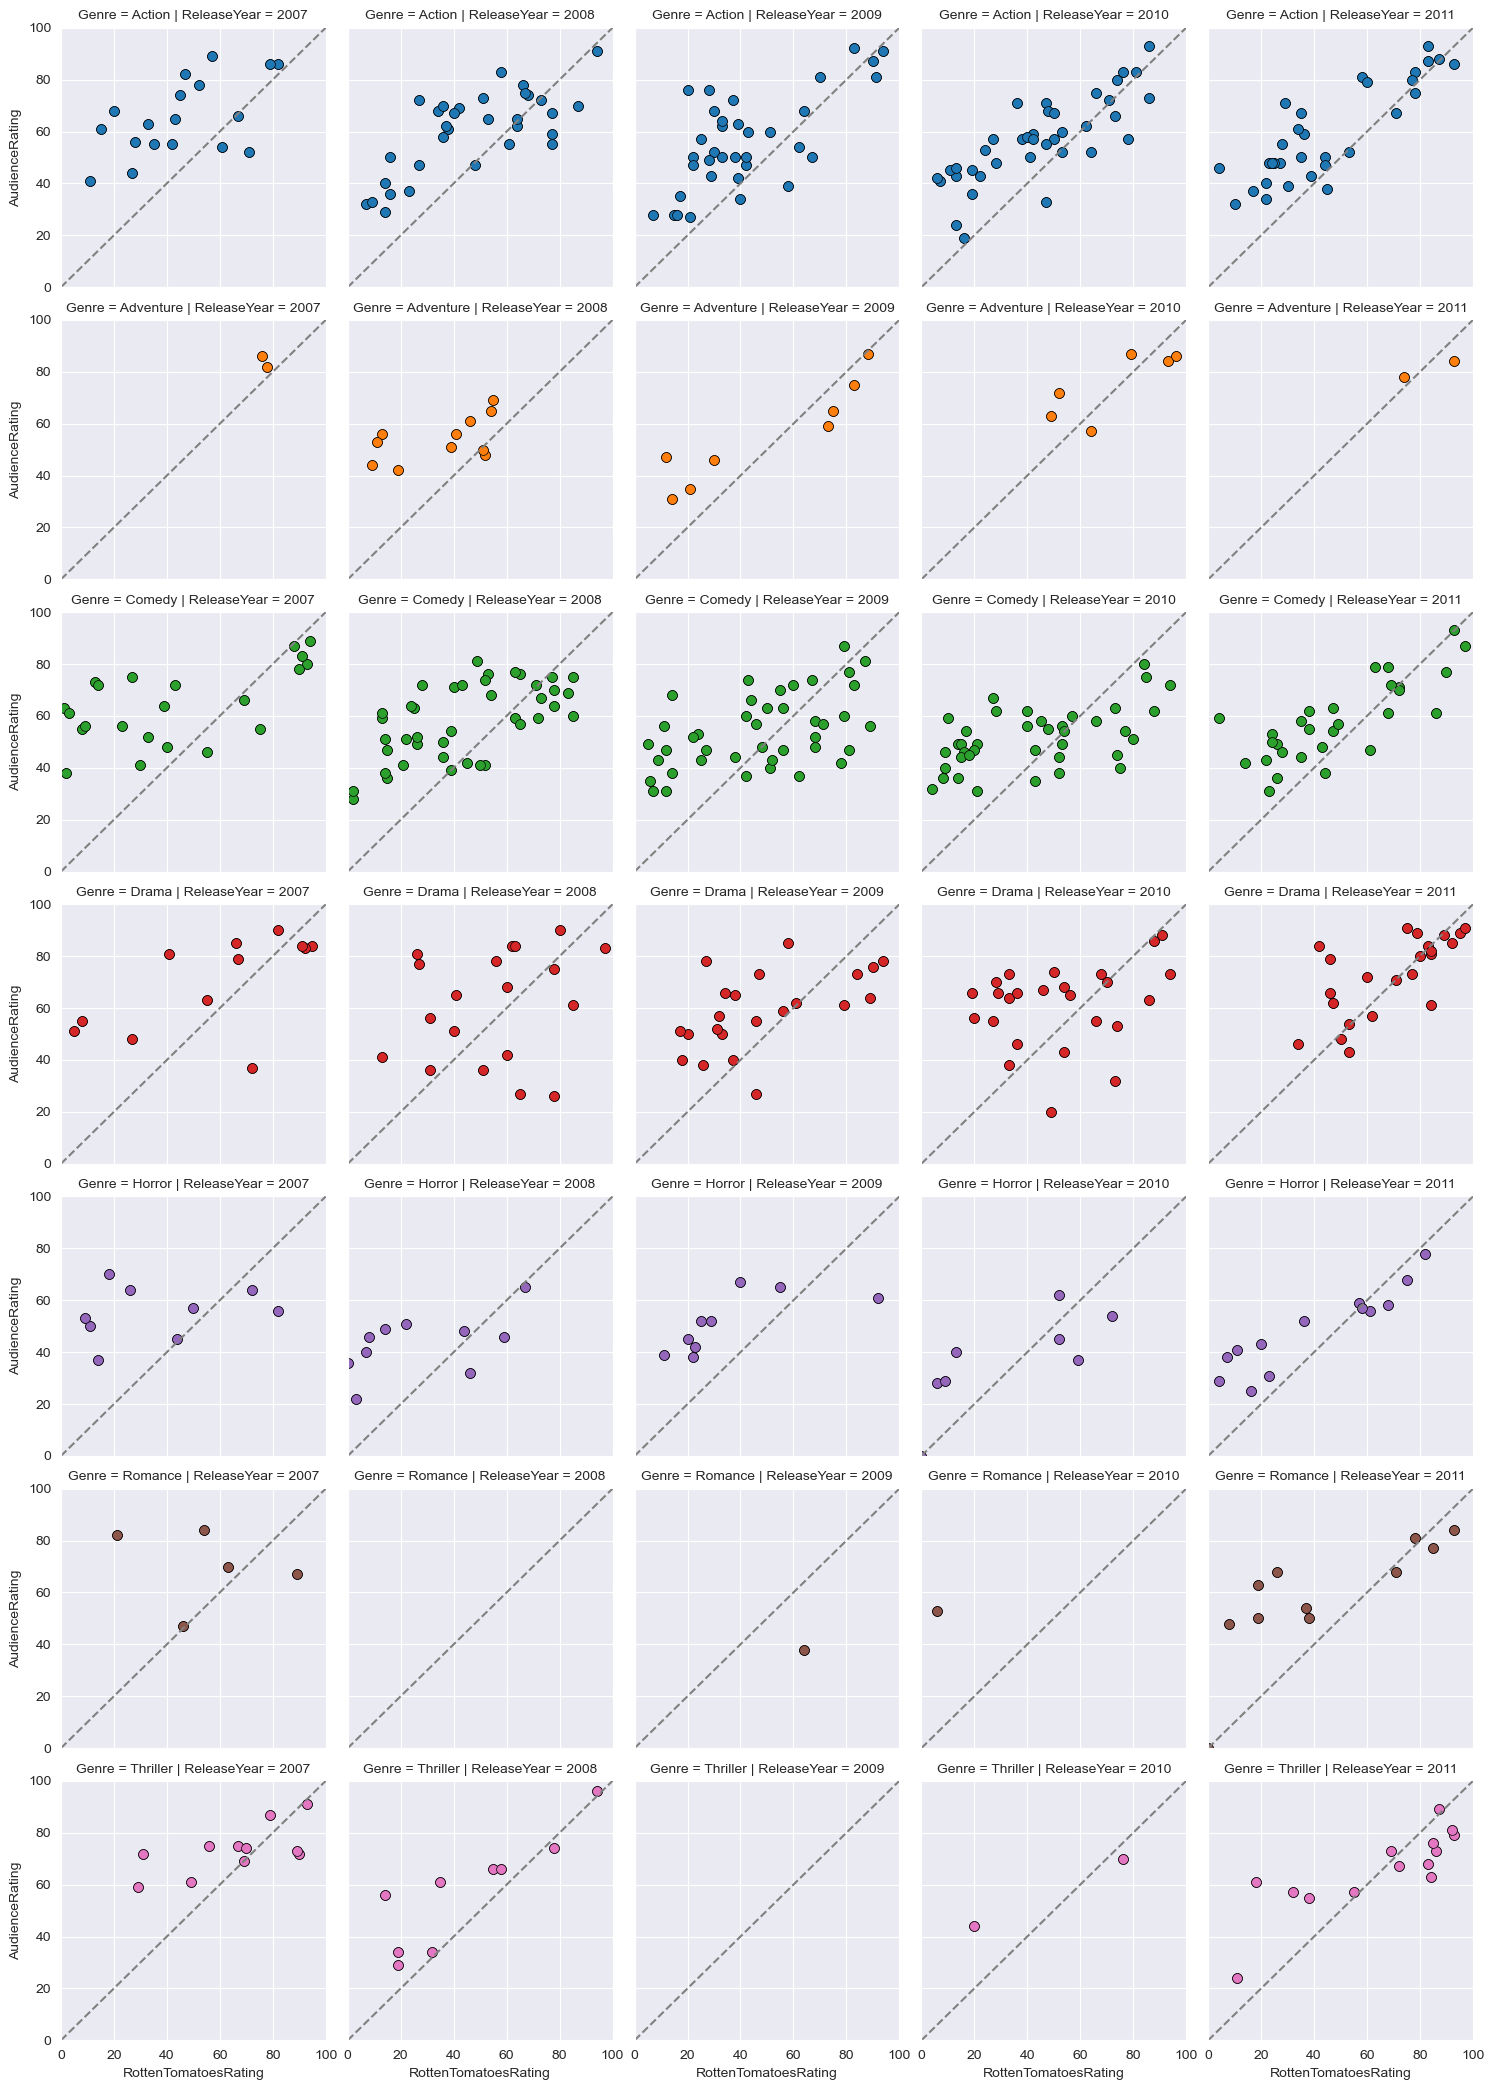

In [22]:
fg2 = sns.FacetGrid(data=movies,row="Genre",col="ReleaseYear",hue="Genre")
kws = dict(s=50,linewidth=0.5,edgecolor='black')
fg2 = fg1.map(plt.scatter,"RottenTomatoesRating","AudienceRating",**kws)
fg2.set(xlim=(0,100),ylim=(0,100))
for ax in fg2.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')